# CW2: Machine Learning Case Study

**Name:** Shubham Verma  

**ID:** 22099668



**Objective:** The objective of this case study is to explore and analyze the Wine Quality dataset using machine learning techniques. It involves tasks such as data loading, preprocessing, exploratory data analysis (EDA), model training, prediction, evaluation, and visualization.

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None,
                        cv=None, n_jobs=None,
                        train_sizes=np.linspace(0.1, 1.0, 10)):

    """
    Generate a learning curve plot.

    Parameters:
    estimator : object
        The estimator object for which the learning curve is plotted.

    title : str
        Title for the chart.

    X : array-like
        Training data.

    y : array-like
        Target labels.

    axes : array of Axes, default=None
        Axes to use for plotting the curves.

    ylim : tuple, default=None
        Defines minimum and maximum y-values plotted.

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.

    n_jobs : int, default=None
        Number of jobs to run in parallel.

    train_sizes : array-like, default=np.linspace(0.1, 1.0, 10)
        Relative or absolute numbers of training examples.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title, fontweight='bold')
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples", fontweight='semibold')
    axes.set_ylabel("Score", fontweight='semibold')

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return axes

### Data Loading and Preprocessing

In [2]:
# Load the Wine Quality dataset
wine = load_wine()
X = wine.data
y = wine.target

# Check for missing values
missing_values = pd.DataFrame(X).isnull().sum().sum()
if missing_values == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the dataset. Imputation may be required.")

# Check for class imbalance
class_distribution = pd.Series(y).value_counts()
print("\nClass Distribution:")
print(class_distribution)

#Normalize features and split into training and testing sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                     random_state=42)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

No missing values found in the dataset.

Class Distribution:
1    71
0    59
2    48
Name: count, dtype: int64


###Exploratory data analysis

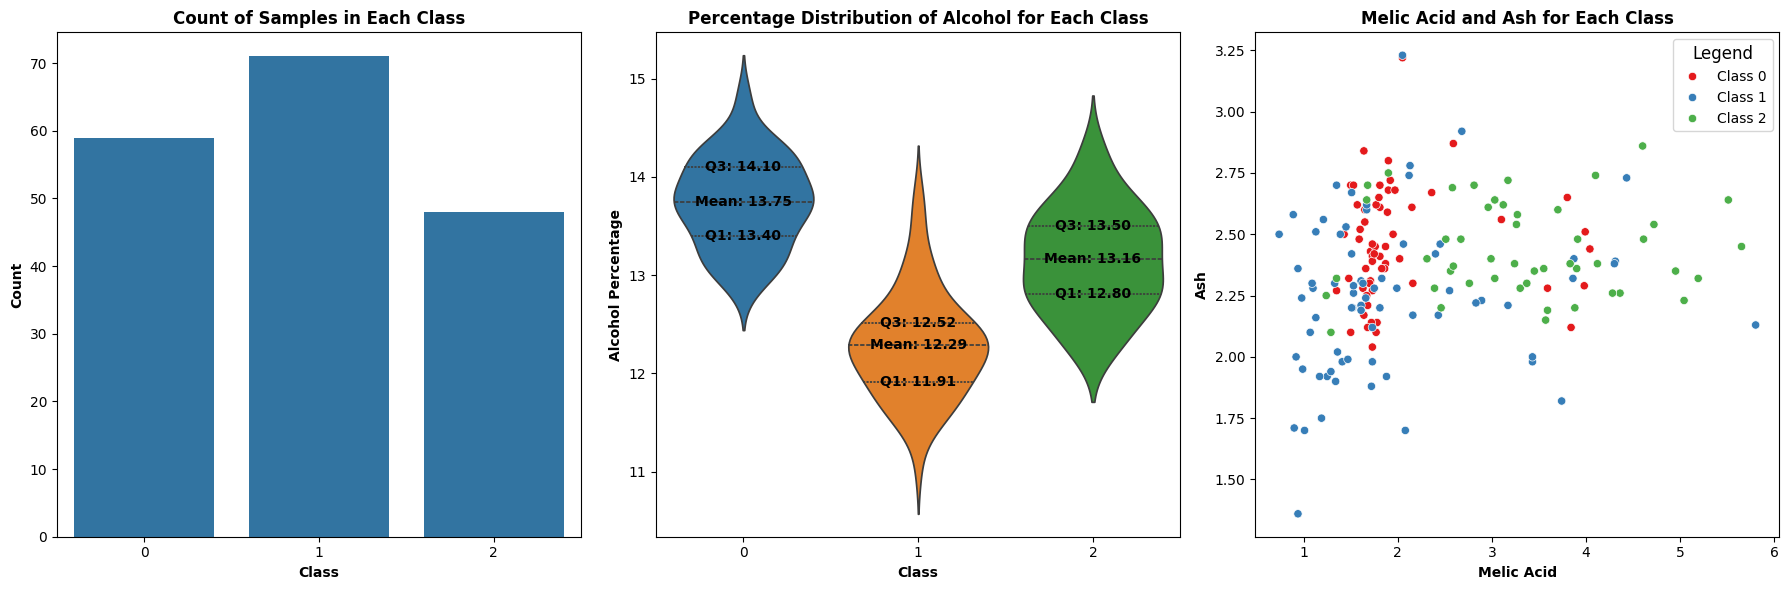

In [14]:
# Fetching class names
class_names = wine.target_names

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Count of samples in each class
sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Count of Samples in Each Class', fontweight='bold')
axes[0].set_xlabel('Class', fontweight='semibold')
axes[0].set_ylabel('Count', fontweight='semibold')

# Plot 2: Percentage Distribution of Alcohol for Each class
alcohol_by_class = [X[y == i, 0] for i in range(len(class_names))]
sns.violinplot(data=alcohol_by_class, ax=axes[1], inner='quartile')
axes[1].set_title('Percentage Distribution of Alcohol for Each Class',
                  fontweight='bold')
axes[1].set_xlabel('Class', fontweight='semibold')
axes[1].set_ylabel('Alcohol Percentage', fontweight='semibold')

# Add annotations for mean, quartiles, etc.
for i in range(len(class_names)):
    median = np.median(alcohol_by_class[i])
    q1 = np.percentile(alcohol_by_class[i], 25)
    q3 = np.percentile(alcohol_by_class[i], 75)
    axes[1].text(i, median, f'Mean: {median:.2f}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black',
                 fontweight='semibold')
    axes[1].text(i, q1, f'Q1: {q1:.2f}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black',
                 fontweight='semibold')
    axes[1].text(i, q3, f'Q3: {q3:.2f}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black',
                 fontweight='semibold')


# Plot 3: Melic Acid and Ash for Each Class
melic_acid = X[:, 1]
ash = X[:, 2]
scatter = sns.scatterplot(x=melic_acid, y=ash, hue=y,
                          palette='Set1', ax=axes[2])
axes[2].set_title('Melic Acid and Ash for Each Class', fontweight='bold')
axes[2].set_xlabel('Melic Acid', fontweight='semibold')
axes[2].set_ylabel('Ash', fontweight='semibold')

# Adjust legend
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles, [f'Class {i}' for i in range(len(class_names))],
               title='Legend', fontsize='medium', title_fontsize='large')

plt.tight_layout()
plt.savefig('EDA_plots.png')
plt.show()


###Model Definition, Training, Prediction and Evaluation

####1. SVM Model

In [4]:
# Train the SVM model with RBF kernel using PCA-transformed features
svm_model_rbf = SVC(kernel='rbf', random_state=42)
svm_model_rbf.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = svm_model_rbf.predict(X_test_pca)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Accuracy: 0.9814814814814815

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


SVM Confusion Matrix:
[[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]


####2. Random Forest Model

In [5]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9444444444444444

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      0.95      0.93        21
           2       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54


Random Forest Confusion Matrix:
[[17  2  0]
 [ 0 20  1]
 [ 0  0 14]]


####3. Multilayer Perceptrons (MLPs)

In [6]:
# Train the MLP model with increased maximum iterations
mlp_model = MLPClassifier(random_state=42, max_iter=1000)  # Increase max_iter to 1000
mlp_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test_pca)

# Evaluate the model's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("\nMLP Accuracy:", accuracy_mlp)
print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("\nMLP Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


MLP Accuracy: 0.9629629629629629

MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54


MLP Confusion Matrix:
[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]


###Visualization

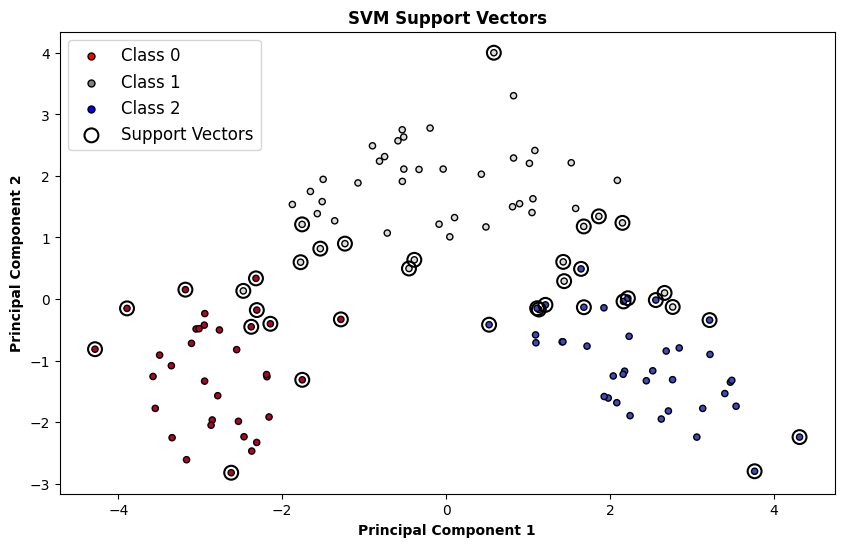

In [7]:
#Visualize support vectors
support_vectors = svm_model_rbf.support_vectors_
plt.figure(figsize=(10, 6))

# Scatter plot for classes with small circles and three colors
for i, color in zip(range(len(np.unique(y_train))),
                    ['red', 'grey', 'blue']):
    plt.scatter([], [], color=color, edgecolor='black',
                label=f'Class {i}', s=25)

# Scatter plot for support vectors with a bigger circle and no color
plt.scatter([], [], s=100, facecolors='none', edgecolors='k', linewidths=1.5,
             label='Support Vectors')

# Plot data points and support vectors
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train,
             cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
             facecolors='none', edgecolors='k', linewidths=1.5)

plt.xlabel('Principal Component 1', fontweight='semibold')
plt.ylabel('Principal Component 2', fontweight='semibold')
plt.title('SVM Support Vectors', fontweight='bold')

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.savefig('Support_vectors_plot.png')

plt.show()

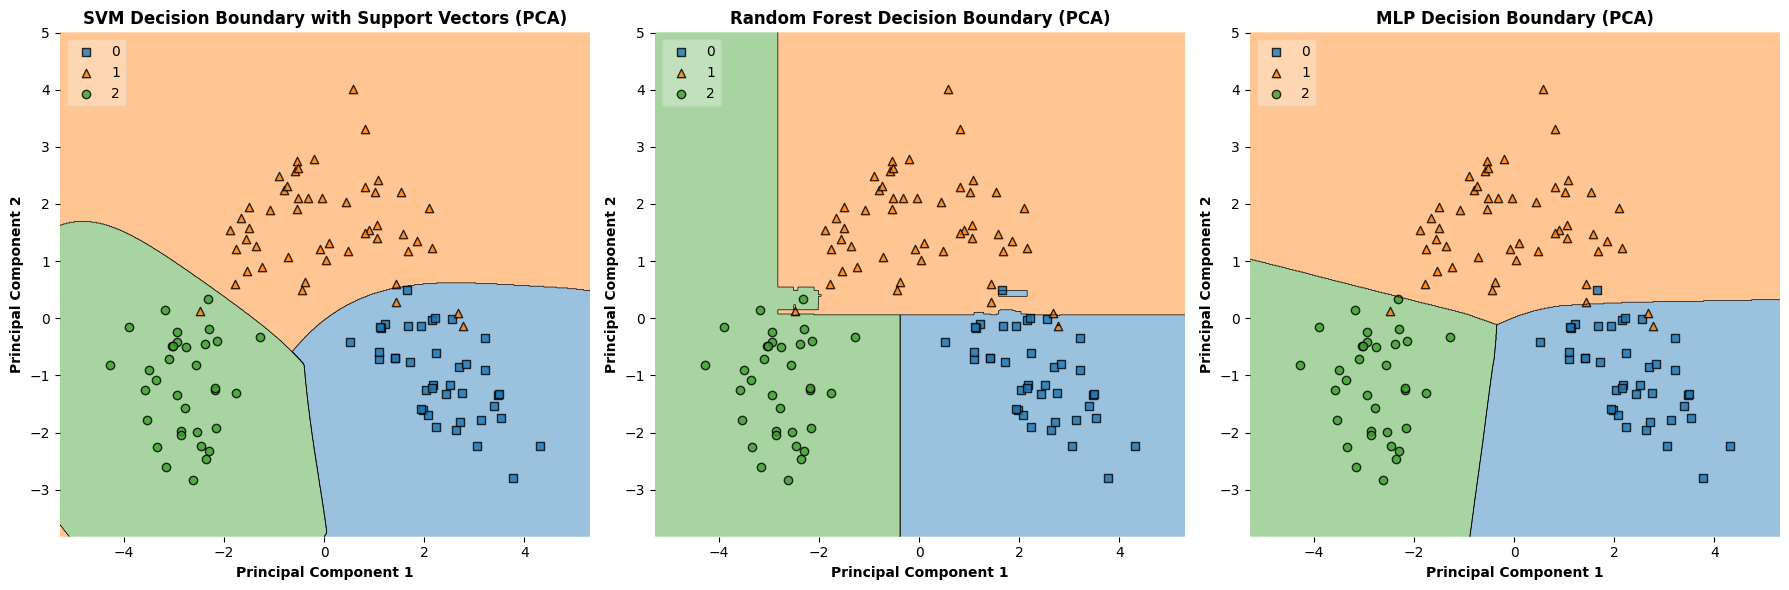

In [8]:
# Plot decision boundaries for SVM, Random Forest, and MLP models in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundary with support vectors for SVM
plot_decision_regions(X_train_pca, y_train, clf=svm_model_rbf,
                      legend=2, ax=axes[0])
axes[0].set_xlabel('Principal Component 1', fontweight='semibold')
axes[0].set_ylabel('Principal Component 2', fontweight='semibold')
axes[0].set_title('SVM Decision Boundary with Support Vectors (PCA)',
                   fontweight='bold')

# Plot decision boundary for Random Forest
plot_decision_regions(X_train_pca, y_train, clf=rf_model,
                      legend=2, ax=axes[1])
axes[1].set_xlabel('Principal Component 1', fontweight='semibold')
axes[1].set_ylabel('Principal Component 2', fontweight='semibold')
axes[1].set_title('Random Forest Decision Boundary (PCA)', fontweight='bold')

# Plot decision boundary for MLP
plot_decision_regions(X_train_pca, y_train, clf=mlp_model,
                      legend=2, ax=axes[2])
axes[2].set_xlabel('Principal Component 1', fontweight='semibold')
axes[2].set_ylabel('Principal Component 2', fontweight='semibold')
axes[2].set_title('MLP Decision Boundary (PCA)', fontweight='bold')

plt.tight_layout()
plt.savefig('decision_boundary_plots.png')
plt.show()

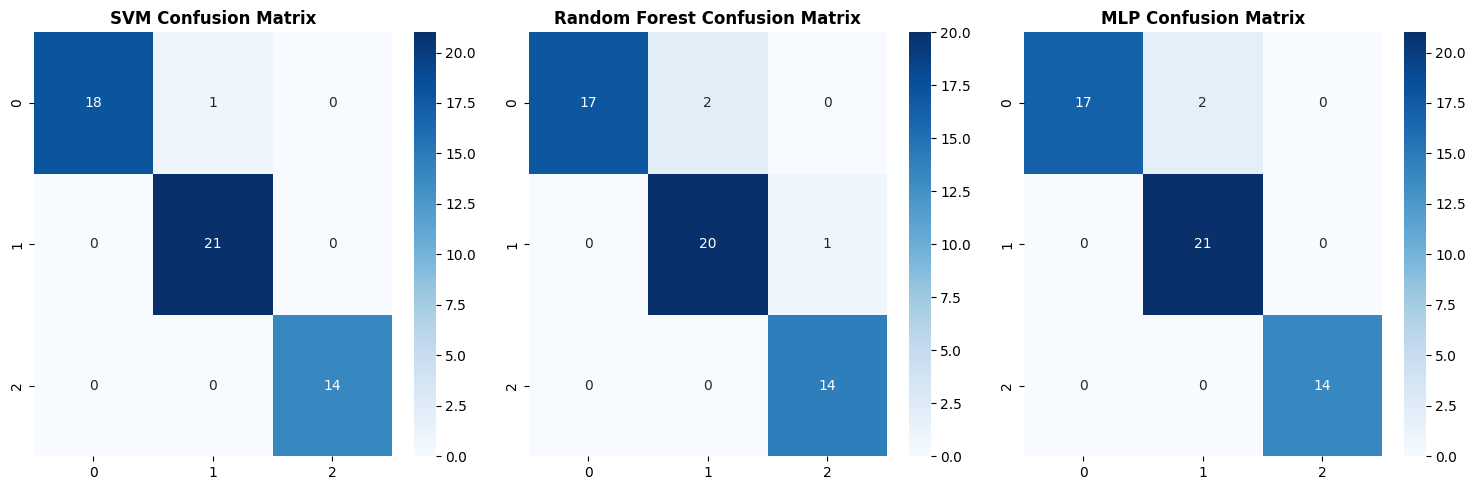

In [9]:
# Create subplots for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot SVM model performance
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
            fmt="d", ax=axes[0])
axes[0].set_title('SVM Confusion Matrix', fontweight='bold')

# Plot Random Forest model performance
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues",
            fmt="d", ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix', fontweight='bold')

# Plot MLP model performance
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, cmap="Blues",
            fmt="d", ax=axes[2])
axes[2].set_title('MLP Confusion Matrix', fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix_plots.png')
plt.show()


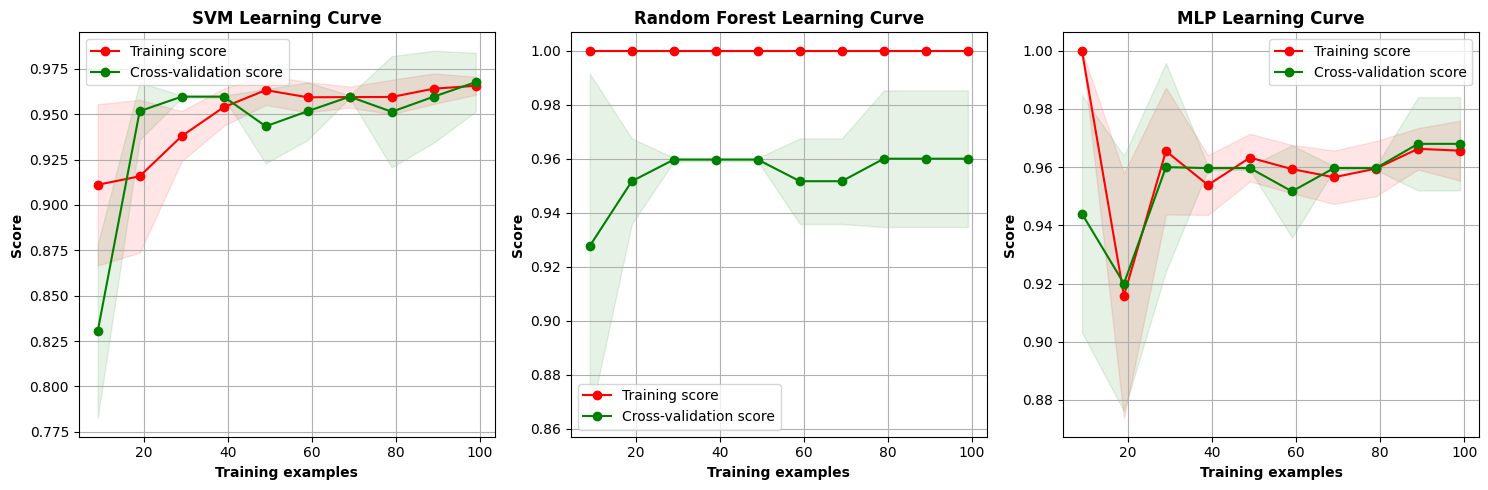

In [10]:
# Plot learning curves for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_learning_curve(svm_model_rbf, "SVM Learning Curve", X_train_pca,
                    y_train, axes=axes[0], cv=5)
plot_learning_curve(rf_model, "Random Forest Learning Curve", X_train_pca,
                    y_train, axes=axes[1], cv=5)
plot_learning_curve(mlp_model, "MLP Learning Curve", X_train_pca,
                    y_train, axes=axes[2], cv=5)

plt.tight_layout()
plt.savefig('learning_curve_plots.png')
plt.show()

####Decision Tree

Decision Tree Accuracy: 0.9259259259259259


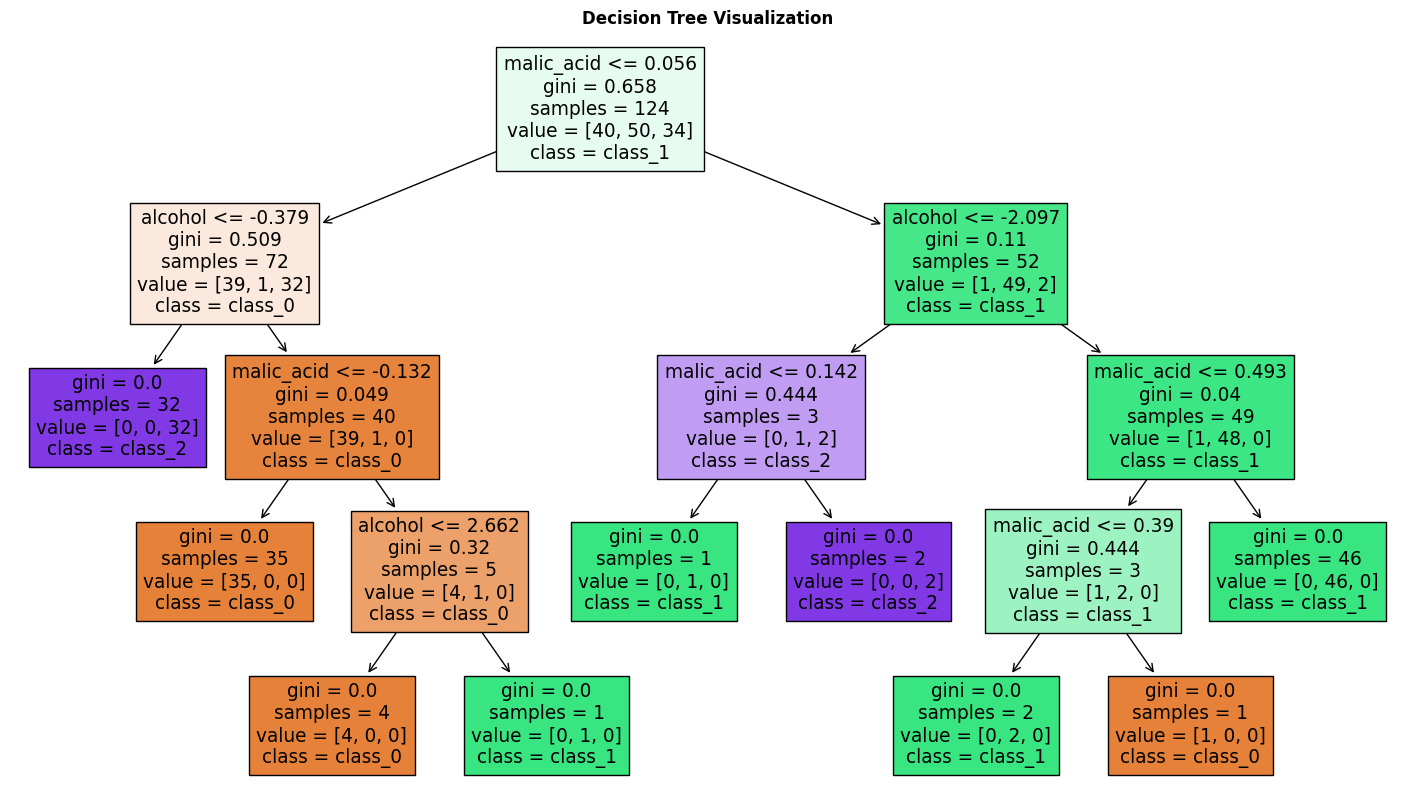

In [11]:
# Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_pca)

# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Visualize the decision tree
plt.figure(figsize=(18, 10))
plot_tree(dt_model, filled=True, feature_names=wine.feature_names,
          class_names=wine.target_names)
plt.title("Decision Tree Visualization", fontweight='bold')
plt.savefig('Decision_Tree.png')
plt.show()